# Import Resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import json

# Load the Dataset

In [2]:
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'ai2_arc', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'forest_fires', 'fuss', 'gap',

In [3]:
dataset, datainfo = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

In [4]:
dataset

{'test': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'validation': <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [5]:
train_set = dataset['train']
test_set = dataset['test']
validation_set = dataset['validation']

# Explore the Dataset

In [6]:
datainfo

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

In [7]:
# Get the number of examples in each set from the dataset info

num_examples_train = datainfo.splits['train'].num_examples
num_examples_test = datainfo.splits['test'].num_examples
num_examples_validation = datainfo.splits['validation'].num_examples

print("The number of examples in train dataset: {}".format(num_examples_train))
print("The number of examples in test dataset: {}".format(num_examples_test))
print("The number of examples in validation dataset: {}".format(num_examples_validation))

The number of examples in train dataset: 1020
The number of examples in test dataset: 6149
The number of examples in validation dataset: 1020


In [8]:
# Get the number of classes in the dataset from the dataset info.

datainfo.features['label'].num_classes

102

In [9]:
train_set

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [10]:
for image, label in train_set.take(3):
    print('The images in the training set have:')
    print('\u2022 shape:', image.shape)
  
    print('\nThe label of the image:')
    print('\u2022 ', label)
    
    print("***************************************")

The images in the training set have:
• shape: (500, 667, 3)

The label of the image:
•  tf.Tensor(72, shape=(), dtype=int64)
***************************************
The images in the training set have:
• shape: (500, 666, 3)

The label of the image:
•  tf.Tensor(84, shape=(), dtype=int64)
***************************************
The images in the training set have:
• shape: (670, 500, 3)

The label of the image:
•  tf.Tensor(70, shape=(), dtype=int64)
***************************************


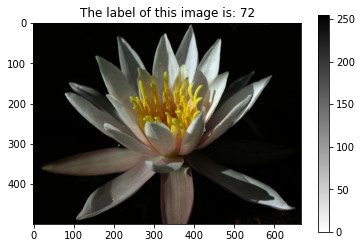

In [11]:
for image, label in train_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.title('The label of this image is: {}'.format(label))
plt.show()

In [12]:
with open('../label_map.json', 'r') as f:
    class_names = json.load(f)

In [13]:
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [14]:
IMG_WIDTH=224
IMG_HEIGHT=224

def process_image(image, label):
    
    print(image.shape)
    
    image = tf.cast(image, tf.float32)
    
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])

    image /= 255
    
    print(image.shape)
    
    return image, label

batch_size = 64

train_set = train_set.map(process_image)

train_batches = train_set.shuffle(num_examples_train).batch(batch_size).prefetch(1)

(None, None, 3)
(224, 224, 3)


In [15]:
train_batches

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [16]:
for image_batch, label_batch in train_batches.take(1):
    print('The images in each batch have:')
    print('\u2022 dtype:', image_batch.dtype) 
    print('\u2022 shape:', image_batch.shape)
  
    print('\nThere are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have:
• dtype: <dtype: 'float32'>
• shape: (64, 224, 224, 3)

There are a total of 64 image labels in this batch:
[ 88  98  93  84  31  80  68  60  83  86  55  19  88  94  99  36  88  39
  28  86  94  16  60  31  35  30  89  55  28  35  68   1  68   8  52  31
  20  47  34  35  83  99  41  17  92  17  25  18  66 100  72  63 101  72
  86  87   5  93  32   8  13  46  44  39]


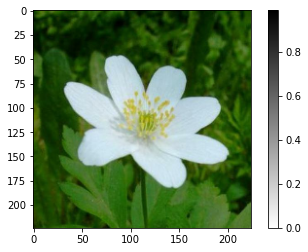

The label of this image is: 68


In [29]:
for image_batch, label_batch in train_batches.take(1):
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()

# Plot the image
plt.imshow(images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', labels[0])